In [1]:
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import average

In [2]:
def extract_params(output_file):
    with open(output_file, 'r') as f:
        lines = f.readlines()
    lines = [line.strip() for line in lines]
    for line in lines:
        if 'Expanded' in line and 'until' not in line:
            expanded = int(line.split('Expanded')[-1].strip().split(" ")[0].strip())
        elif 'Evaluated' in line and 'until' not in line:
            evaluated = int(line.split('Evaluated')[-1].strip().split(" ")[0].strip())
        elif 'Generated' in line and 'until' not in line:
            generated = int(line.split('Generated')[-1].strip().split(" ")[0].strip())
        elif 'Search time' in line:
            search_time = round(float(line.split(':')[-1].strip().replace('s', '')), 6)
        elif 'Total time' in line:
            total_time = round(float(line.split(':')[-1].strip().replace('s', '')), 6)

    return expanded, evaluated, generated

In [3]:
test_log_files = glob.glob("plans/*test*log*.txt")
log_files = glob.glob("plans/log*.txt")

In [4]:
expanded_list = []
evaluated_list = []
generated_list = []
for file in log_files:
    expanded, evaluated, generated = extract_params(file)
    expanded_list.append(expanded)
    evaluated_list.append(evaluated)
    generated_list.append(generated)

expanded_list_test = []
evaluated_list_test = []
generated_list_test = []
for file in test_log_files:
    expanded, evaluated, generated = extract_params(file)
    expanded_list_test.append(expanded)
    evaluated_list_test.append(evaluated)
    generated_list_test.append(generated)

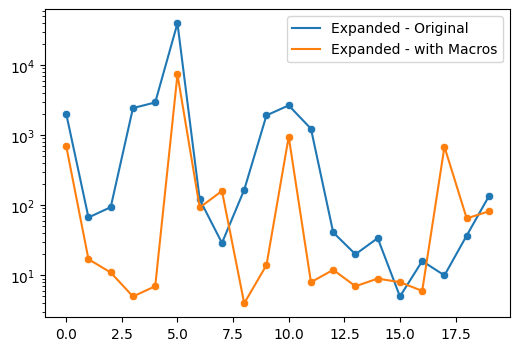

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(x=range(len(expanded_list)), y=expanded_list, ax=ax)
sns.scatterplot(x=range(len(expanded_list_test)), y=expanded_list_test, ax=ax)

sns.lineplot(x=range(len(expanded_list)), y=expanded_list, label="Expanded - Original", ax=ax)
sns.lineplot(x=range(len(expanded_list_test)), y=expanded_list_test, label="Expanded - with Macros", ax=ax)

ax.set_yscale('log')


In [6]:
print("Average Expanded: ", round(average(expanded_list)), round(average(expanded_list_test)))
print("Average Evaluated: ", round(average(evaluated_list)), round(average(evaluated_list_test)))
print("Average Generated: ", round(average(generated_list)), round(average(generated_list_test)))

Average Expanded:  2672 510
Average Evaluated:  10660 3974
Average Generated:  30871 11468
